Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise07/exercise07.ipynb)

# Exercise 7

## Problem

In week 7, you learned how to extend tabular data with geospatial information: points, linestrings, and polygons.

For this next exercise, please ask a planning-related question with a spatial component, then find data and apply any data science methods you have learned so-far (or can Google!) to answer that question.

## Data

You are welcome to use any data you would like, including data used in previous demos and exercises.

## A Few Pointers
- Choose a straightforward question that requires a reasonable amount of data! Don't shoot for the moon. This exercise is intended to give you a chance to practice finding and analyzing spatial data, not to address the world's greatest challenges.
- Consider using this exercise to get a head start on your final project or explore options for it. Your project doesn't need to focus on spatial analysis for it to play a role. Are there datasets you might join together based on spatial locations?
- Don't go overboard. If you're hitting a wall with coding, write pseudocode and turn that in. Don't let the perfect be the enemy of the done. But if you're energized and having fun by chasing down a thorny solution to a coding problem, by all means feel free to keep at it!



In [ ]:
# QUESTION: which wards in DC have the most greenspace? which have the fewest?



# Use geopandas to read ward boundaries data (shapefile or GeoJSON).
# Use pandas or relevant library to read park locations data.
# Data Cleaning:
# Ensure both datasets have a common field for ward identification (e.g., ward number, name).
# Clean and format the data as needed.
# Ward-Park Count:
# Use a loop to iterate through parks data.
# For each park, identify the ward it belongs to using the common field.
# Increment a counter specific to that ward in a dictionary.
# Finding the Winner:
# Identify the ward with the highest park count in the dictionary.

In [2]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Import packages
import os
import json
import requests
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Set the working directory
os.chdir('/content/drive/MyDrive/School/UMD Classes/Colab Notebooks/exercise07')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


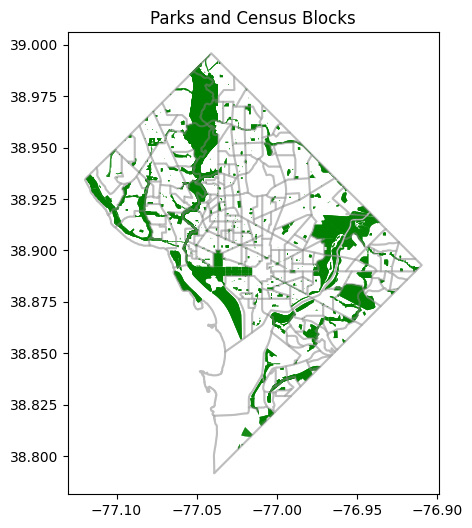

 Census Block  Number of Parks
           21               32
          108               31
            1               29
          100               28
          162               24
           14               24
          190               23
          111               22
          199               19
           95               19
          107               18
           75               18
           76               18
          192               18
           38               16
           33               16
          200               16
            5               15
           23               14
          128               14
           12               14
          124               14
          171               14
           70               13
          141               13
          105               13
           27               13
          155               13
          126               12
           32               12
           15               12
        

In [44]:
# Define the file paths to shapefiles
shapefile_NPS = "National_Parks/National_Parks.shp"
shapefile_DPR = "Parks_and_Recreation_Areas/Parks_and_Recreation_Areas.shp"
shapefile_TM = "Triangles_and_Medians/Triangles_and_Medians.shp"
shapefile_TR = "Urban_Tree_Canopy_by_DC_Boundary_in_2020/Urban_Tree_Canopy_by_DC_Boundary_in_2020.shp"
shapefile_Ward = "Wards_from_2022/Wards_from_2022.shp"
shapefile_Census = "acs2022_5yr_B01003_14000US11001009904/Census_Block_2022.shp"

# Read each shapefile into a GeoDataFrame
gdf_NPS = gpd.read_file(shapefile_NPS)
gdf_DPR = gpd.read_file(shapefile_DPR)
gdf_TM = gpd.read_file(shapefile_TM)
gdf_TR = gpd.read_file(shapefile_TR)
gdf_Ward = gpd.read_file(shapefile_Ward)
gdf_Census = gpd.read_file(shapefile_Census)

# Combine the parks-based GeoDataFrames into one
gdf_PARKS = pd.concat([gdf_NPS, gdf_DPR], ignore_index=True)

# Perform spatial join to show parks that are both within and in between tracts
joined_within_df = gpd.sjoin(gdf_PARKS, gdf_Census, how="inner", op="within")
joined_intersects_df = gpd.sjoin(gdf_PARKS, gdf_Census, how="inner", op="intersects")

# Combine the results
combined_df = pd.concat([joined_within_df, joined_intersects_df])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
combined_df.plot(ax=ax, column="geometry_x", color="green", alpha=0.7, marker="*", label="Intersects")
gdf_Census.boundary.plot(ax=ax, color="grey", alpha=0.3, label="Census Block")
ax.set_title("Parks and Census Blocks")
plt.show()

# Count the number of parks within each Tract
point_counts_tract = combined_df['index_right'].value_counts()

# Clean the data to remove info for entirety of DC
filtered_counts = point_counts_tract[point_counts_tract.index < 204]

# Sort by tract total (highest to lowest)
point_counts_sorted_tract = filtered_counts.sort_values(ascending=False).reset_index()
point_counts_sorted_tract.columns = ['Census Block', 'Number of Parks']

# Print results
print(point_counts_sorted_tract.to_string(index=False))

In [ ]:
# # Perform the spatial join
# gdf_PARKS_by_Ward = gpd.sjoin(gdf_PARKS, gdf_Ward, how=join_type, op=operation)

# # Perform a spatial join between Ward boundaries and parks
# gdf_PARKS_by_Ward = gpd.sjoin(gdf_PARKS, gdf_Ward, how="inner", predicate="within")

# gdf_PARKS_by_Ward.plot()

# # Count the number of parks within each Ward
# point_counts = gdf_PARKS_by_Ward['index_right'].value_counts()

# # Filter parks within Ward Zero based on the ward ID column
# ward_zero_parks = joined_gdf[joined_gdf['index_right'] == 0]

# # Extract park names
# park_names = ward_zero_parks['NAME_left'].tolist()

# # Print the list of parks in Ward Zero
# if park_names:
#   print("Parks in Ward Zero:")
#   for park in park_names:
#     print(park)
# else:
#   print("No parks found in Ward Zero.")

# # Sort by ward total (highest to lowest) and reset index for clarity
# point_counts_sorted = point_counts.sort_values(ascending=False).reset_index()
# point_counts_sorted.columns = ['Ward', 'Park Count']

# # Print results
# print(point_counts_sorted.to_string(index=False))